Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


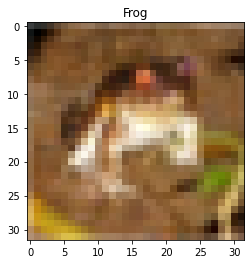

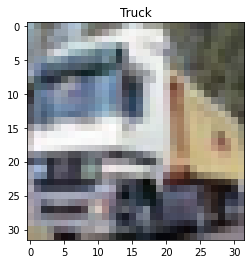

In [3]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator


# List of names for each CIFAR10 class
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

# Load the entire data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Loop through each picture in the data set
for i in range(2):
    # Grab an image from the data set
    sample_image = x_train[i]
    # Grab the image's expected class id
    image_class_number = y_train[i][0]
    # Look up the class name from the class id
    image_class_name = cifar10_class_names[image_class_number]

    # Draw the image as a plot
    plt.imshow(sample_image)
    # Label the image
    plt.title(image_class_name)
    # Show the plot on the screen
    plt.show()

# applying transformation to image
train_gen = ImageDataGenerator(rotation_range=45, 
                               width_shift_range=0.1, 
                               shear_range=0.3, 
                               height_shift_range=0.1, 
                               zoom_range=0.1,
                               horizontal_flip=True)
# test_gen = ImageDataGenerator()
train_gen.fit(x_train)

In [4]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from pathlib import Path

# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert class vectors to binary class matrices
# Our labels are single values from 0 to 9.
# Instead, we want each label to be an array with on element set to 1 and and the rest set to 0.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

training_set= train_gen.flow(x_train, y_train, batch_size=128)
test_set= train_gen.flow(x_test, y_test, batch_size=128)

In [5]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3)))
# model.add(LeakyReLU(alpha=0.05))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size=(3, 3)))
# model.add(LeakyReLU(alpha=0.05))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(256))

# model.add(LeakyReLU(alpha=0.05))
# model.add(Dense(10, activation='softmax'))

# model.add(Conv2D(32, kernel_size=(3, 3), input_shape =(32, 32, 3)))
# model.add(LeakyReLU(alpha=0.05))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size=(3, 3)))
# model.add(LeakyReLU(alpha=0.05))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, kernel_size=(3, 3)))
# model.add(LeakyReLU(alpha=0.05))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dropout(0.25))
# model.add(Dense(128))
# model.add(LeakyReLU(alpha=0.1))

# model.add(BatchNormalization())
# model.add(Dropout(0.4))
# model.add(Dense(10, activation='softmax'))

# Print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)       

In [6]:
import tensorflow as tf

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    
    optimizer=tf.keras.optimizers.RMSprop(
        learning_rate=0.001,
        rho=0.9,
        momentum=0.9,
        epsilon=1e-07,
        centered=False,
        name="RMSprop",
    ),
    
    metrics=['accuracy']
)

In [7]:
# Train the model
with tf.device('/device:GPU:0'):
  model.fit(
      training_set,
      epochs=200,
      validation_data=test_set,
      verbose=1,
      shuffle=True
  )

Epoch 1/200
391/391 [==============================] - 55s 141ms/step - loss: 14.0273 - accuracy: 0.1963 - val_loss: 9.3475 - val_accuracy: 0.1077
Epoch 2/200
391/391 [==============================] - 45s 116ms/step - loss: 1.9677 - accuracy: 0.2976 - val_loss: 2.6121 - val_accuracy: 0.2353
Epoch 3/200
391/391 [==============================] - 45s 115ms/step - loss: 2.0400 - accuracy: 0.3097 - val_loss: 1.2146 - val_accuracy: 0.3176
Epoch 4/200
391/391 [==============================] - 45s 116ms/step - loss: 1.9051 - accuracy: 0.3321 - val_loss: 1.6630 - val_accuracy: 0.3372
Epoch 5/200
391/391 [==============================] - 45s 115ms/step - loss: 1.7796 - accuracy: 0.3687 - val_loss: 1.6883 - val_accuracy: 0.3587
Epoch 6/200
391/391 [==============================] - 45s 116ms/step - loss: 1.6932 - accuracy: 0.4024 - val_loss: 1.7130 - val_accuracy: 0.3866
Epoch 7/200
391/391 [==============================] - 46s 117ms/step - loss: 1.6446 - accuracy: 0.4238 - val_loss: 2.2411 

In [8]:
# Train the model
with tf.device('/device:GPU:0'):
  model.fit(
      training_set,
      epochs=50,
      validation_data=test_set,
      verbose=1,
      shuffle=True
  )

Epoch 1/50
391/391 [==============================] - 45s 114ms/step - loss: 1.0238 - accuracy: 0.7256 - val_loss: 0.3759 - val_accuracy: 0.7581
Epoch 2/50
391/391 [==============================] - 44s 114ms/step - loss: 1.0336 - accuracy: 0.7214 - val_loss: 2.3786 - val_accuracy: 0.6519
Epoch 3/50
391/391 [==============================] - 44s 113ms/step - loss: 1.0492 - accuracy: 0.7240 - val_loss: 0.7616 - val_accuracy: 0.7212
Epoch 4/50
391/391 [==============================] - 44s 112ms/step - loss: 1.0659 - accuracy: 0.7237 - val_loss: 1.0546 - val_accuracy: 0.7348
Epoch 5/50
391/391 [==============================] - 44s 112ms/step - loss: 1.0152 - accuracy: 0.7260 - val_loss: 0.6241 - val_accuracy: 0.7624
Epoch 6/50
391/391 [==============================] - 44s 112ms/step - loss: 1.0124 - accuracy: 0.7269 - val_loss: 1.3179 - val_accuracy: 0.7283
Epoch 7/50
391/391 [==============================] - 44s 113ms/step - loss: 1.0537 - accuracy: 0.7252 - val_loss: 0.8410 - val_ac

In [9]:
# Train the model
with tf.device('/device:GPU:0'):
  model.fit(
      training_set,
      epochs=100,
      validation_data=test_set,
      verbose=1,
      shuffle=True
  )

Epoch 1/100
391/391 [==============================] - 45s 115ms/step - loss: 1.0229 - accuracy: 0.7363 - val_loss: 1.1500 - val_accuracy: 0.7560
Epoch 2/100
391/391 [==============================] - 45s 115ms/step - loss: 1.0136 - accuracy: 0.7369 - val_loss: 0.7941 - val_accuracy: 0.7638
Epoch 3/100
391/391 [==============================] - 44s 114ms/step - loss: 1.0025 - accuracy: 0.7365 - val_loss: 1.0882 - val_accuracy: 0.7590
Epoch 4/100
391/391 [==============================] - 44s 113ms/step - loss: 1.0337 - accuracy: 0.7353 - val_loss: 0.8646 - val_accuracy: 0.7472
Epoch 5/100
391/391 [==============================] - 44s 113ms/step - loss: 1.0228 - accuracy: 0.7340 - val_loss: 0.7798 - val_accuracy: 0.7611
Epoch 6/100
391/391 [==============================] - 44s 113ms/step - loss: 1.0224 - accuracy: 0.7352 - val_loss: 0.4561 - val_accuracy: 0.7504
Epoch 7/100
391/391 [==============================] - 44s 113ms/step - loss: 1.0144 - accuracy: 0.7369 - val_loss: 0.3257 -